# 1. Empirisches Projekt
---
### **Skript zu Daten Manipulation, Visulallisierung und zur Regressions Analyse**
Dieses Sktipt soll euch helfen eine Datenanalyse sowie eine Simple oder eine Mutiple Regression aufzubauen.
-> Falls ihr fragen habt bitte sagt mir bescheid ich helfe gerne aus!


> E-Mail: riccardo.dandrea@live.de
> Ihr könnte gerne eine Mail schreiben wo wir uns Per zoom treffen können, falls ihr schwierigkeiten habt bei der Programmierung:
> BITTE schreibt in der MAIL:
> - Was habt ihr vor ?
> - Wo liegt das Problem mit Code und Fehlermeldung
> - und wann ihr euch Per zoom treffen wollt Tag und Uhrzeit.
>
> Gerne bitte ich auch eine Sprechstunde neben den Vorlesungen wo wir uns einmal wöchentlich treffen und Ihr mir direkt Fragen stellt könnte.


Für die Datenanalyse kann als unterstützung der Leitfaden "Leitfaden.ipynbn" als unterstützung genutzt werden.
Ab Punkt 2. wird erklärt wie Libaries installiert werden und wie die Daten eingelesen werden können. Sowie weitere Schritte zur Datenanalyse.

---

Informationen zu den Daten findest du unter folgenden 
Link: https://www.kaggle.com/datasets/shubhamgupta012/titanic-dataset

The dataset includes the following columns:

- PassengerId: Unique identifier for each passenger.
- Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived).
- Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).
- Sex: Gender of the passenger.
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard the Titanic.
- Parch: Number of parents/children aboard the Titanic.
- Fare: Fare paid by the passenger.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# Google Colab:
---
##### 1. [Python Programmierung mit Google Colab link](https://colab.research.google.com/drive/1KXsA9WTFS9AxezEEaI3gYirv42b5-0rb#scrollTo=VJul2ijN-eHj)

<img src="Pictures_for_Explanation/1_Google_Colab_Starten.png" alt="Bildbeschreibung" width="700"/>



##### 2. Um ein Skript zu öffnen Navigiert auf Datei was oben Rechts vorzufinden ist und klickt "Notebook öffnen"

<img src="Pictures_for_Explanation/2_Datei_Optionen_öffnen.png" alt="Bildbeschreibung" width="700"/>

##### 3. Danach geht ihr  auf Github und fügt folgenden Link hinzu https://github.com/RiccardoDAndrea/Python-Crashkurs

<img src="Pictures_for_Explanation/3_Zuletzt_Geöffnet.png" alt="Bildbeschreibung" width="700"/>

##### 4. Nachdem Laden werdet ihr mehere Datein wie Skripte vorfinden.
<img src="Pictures_for_Explanation/4_Github_URL_eingeben.png" alt="Bildbeschreibung" width="700"/>

##### 5. Für die Mutiple Lineare Regression wählt ihr Python_LOG.ipynb und somit habt ihr erfolgreich das Skript zur bearbeitung eingeladen
<img src="Pictures_for_Explanation/5_Python_MLR.png" alt="Bildbeschreibung" width="700"/>


## Daten einladen
---

In [1]:
import os
if not os.path.exists("Data"):
    print("Ordner Data erstellt")
    os.makedirs("Data") 
elif os.path.exists("Data"):
    print("Ordner Data ist bereits vorhanden")


if not os.path.exists("LOG_Output"):
    print("Ordner LOG_Output erstellt")
    os.makedirs("LOG_Output") 
elif os.path.exists("LOG_Output"):
    print("Ordner LOG_Output ist bereits vorhanden")

# Erstellt dir ein Ordner wo du deine Daten speichern kannst

Ordner Data ist bereits vorhanden
Ordner LOG_Output ist bereits vorhanden


In [2]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Hier wird der Download für den Datensatz vorbereitet
file_id = '1uujka4TJygnHSrai5rDmao8z9SeP_PsE'
download_link = f"https://drive.google.com/uc?id={file_id}"

In [4]:
# Einen Datensatz mit Pandas laden
df = pd.read_csv(download_link, sep = ",")
df.to_csv("Data/titantic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

Um Redundante Spalten zu entfern kannst du folgende Funktion nutzen:

In [6]:
#df.drop(columns=["Spalte"], inplace=True) #<- Füge hier deine Spalte ein die du entferenen willst

## Anpassung der Datentypen
---
Bevor Daten richtig Manipuliert werden können ist es von wichtigkeit die Datentypen anzupassen.
Welche Datentypen es gibt kannst du im Detail im Leitfaden nachlesen unter Punkt 1.3.

Folgende Datentypen gibt es:

-> `"string"`

-> `"int"`

-> `"float"`

-> `"bool"`

-> `"category"`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Entscheide nun im folgenden welcher Datentyp am besten wäre für  deine Daten:**

In [8]:
df['Survived'] = df["Survived"].astype("category")
# df['Age'] = df['Age'].astype("int")
# df['Name'] = df['Name'].astype("Dein_Datentyp")
# df['Sex'] = df['Sex'].astype("Dein_Datentyp")
# df['Ticket'] = df['Ticket'].astype("Dein_Datentyp")
# df['Cabin'] = df['Cabin'].astype("Dein_Datentyp")
# df['Embarked'] = df['Embarked'].astype("Dein_Datentyp")

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Statistische Zusammenfassung:
---

In [9]:
df.describe().round(2)

with open('LOG_Output/out.txt', 'w') as f:
    f.write(df.describe().round(2).to_string()) 

Umgang mit NaN-Werten (Not a Number):
---
NaN Werte sind Daten die nicht richtig erhoben worden oder auch fehler enthalten

**Fehlende Werte:**
Der Umgang mit fehlenden Werten ist ein entscheidender Schritt bei der Datenvorbereitung und sollte für jede Spalte individuell betrachtet werden.

Die zentrale Frage sollte immer lauten: **Kann ich die fehlenden Werte sinnvoll ersetzen?**

Beispiel: Spalte `"Age"` (Alter)
In diesem Fall stellt sich die Frage: Kann man fehlende Werte in der Spalte `"Age"` sinnvoll ersetzen?

- Antwort: NEIN. Das Alter lässt sich nicht einfach durch den Median, den Modus, den Mittelwert oder den vorherigen Wert ersetzen. Ein solches Vorgehen könnte die Daten erheblich verfälschen, was letztlich dazu führen würde, dass das Modell ungenaue Vorhersagen trifft. Diese Art der Datenmanipulation würde dazu führen, dass das Modell auf falschen Annahmen basiert, was gravierende Auswirkungen auf die Regressionsanalyse und die Vorhersagegenauigkeit hätte.

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Im Folgenden sehen wir das Beispiel an unseren Datensatz und sehen
- Age fehlen 177 Werte
- Cabin fehlend 687 Werte
- Embarked fehlen 2 Werte.

Wie würdet ihr mit den fehlenden Werten umgehen begründet eure Entscheidung?

In [11]:
# Lösche die Zeilen mit NaN values. ACHTUNG hier werden aus deinem Dataframe ALLE Na values entfernt
df = df.dropna(subset=['Age'])
#df = df.dropna()

# Fülle die NaN values mit einem Wert deiner Wahl. ACHTUNG hier werden aus deinem Dataframe ALLE Na values ersetzt mit der eingefügten Zahl

#df = df.fillna() # Ein Zahl, Formel oder auch ein Funktion kann eingeben. Sollte jedoch immer ein Zahl (int oder float) returnen

# Fülle die NaN values mit dem Durchschnittswert der Spalte

#df["wage"]= df["wage"].fillna(df["wage"].mean()) # nur eine Spalte werden die Daten ersetzt
#df = df.fillna(df.mean()) #<- mean(), mode(), median() / Alle Spalten werden ersetzt

In [12]:
df.shape

(714, 12)

Es ist immer wieder sinnvoll sich die Daten anzuschauen, um zu sehen ob die Daten richtig verarbeitet wurden.

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Datenfilterung
---
Mit der möglichkeit Daten zufiltern kannst du deine Daten so unterteilen. Um Strukturen oder auch Gruppen festzuleggen die du später
genau untersuchen möchtest.

In [14]:
df_filtered_dead = df[(df["Survived"] == 0)] #<- ein Dataframe nur mit verstorben

In [15]:
df_filtered_dead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [16]:
df_filtered_sur = df[(df["Survived"] == 1)]  #<- ein Dataframe nur mit den Überlebenden
df_filtered_sur.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
df_filtered = df[(df["Survived"] == 1) &
                     (df["Pclass"] == 1)]

df_filtered


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [18]:
df["Survived"].value_counts()

Survived
0    424
1    290
Name: count, dtype: int64

## Visualisation
---
Daten zu Visualisieren geben die neue und detalierte einsichten in deinen Daten daher ist es ratsam sich die Zeit zu nehmen und sich die Daten zu visualisieren

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

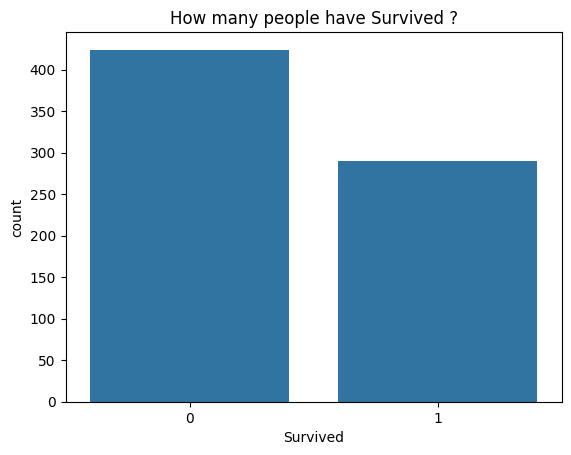

In [20]:
sns.countplot(x='Survived', data=df)
plt.title("How many people have Survived ?")
#plt.xlabel("Survial count plot")
#plt.legend(['First line', 'Second line'],loc="upper left")

plt.savefig("LOG_Output/Title_") 
plt.show()


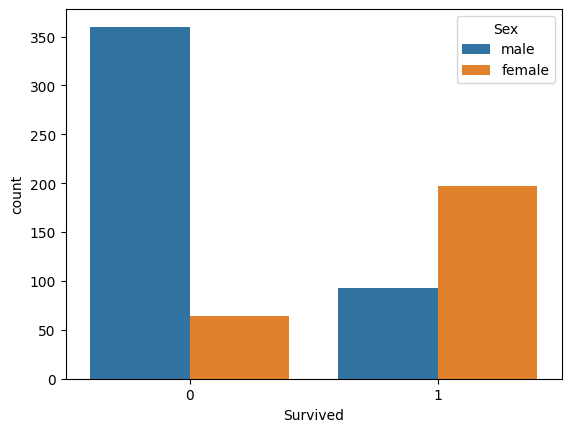

In [21]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.savefig("LOG_Output/Title_") 
plt.show()

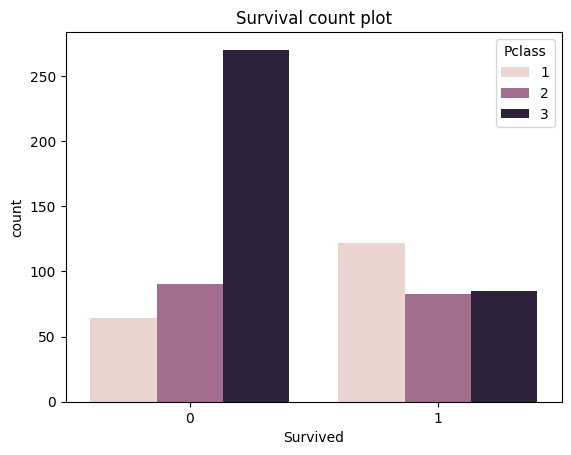

In [22]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title("Survival count plot")
plt.savefig("LOG_Output/Title_") 
plt.show()

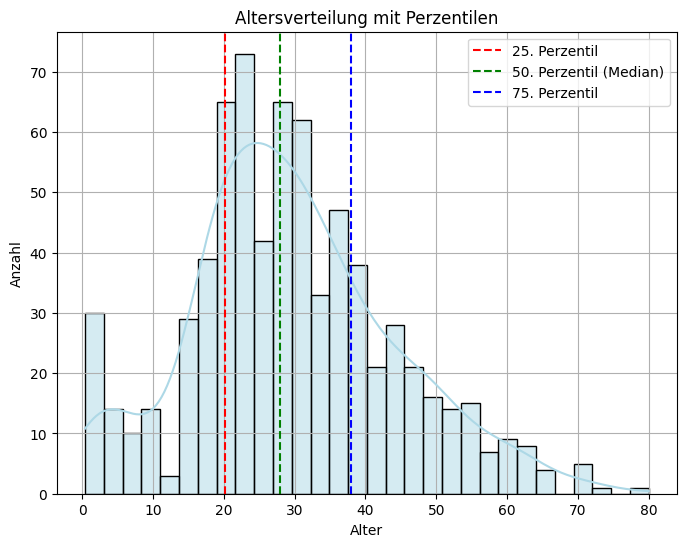

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Daten ohne NaN-Werte
data_age = df['Age'].dropna()

# Berechne die Perzentile (25., 50., 75.)
q25_age = np.percentile(data_age, 25)
q50_age = np.percentile(data_age, 50)  # Median
q75_age = np.percentile(data_age, 75)

# Erstelle den Plot
plt.figure(figsize=(8, 6))

# Plot der Verteilung
sns.histplot(data_age, kde=True, bins=30, color="lightblue")

# Füge die vertikalen Linien für die Perzentile hinzu
plt.axvline(x=q25_age, color='red', linestyle='--', label='25. Perzentil')
plt.axvline(x=q50_age, color='green', linestyle='--', label='50. Perzentil (Median)')
plt.axvline(x=q75_age, color='blue', linestyle='--', label='75. Perzentil')

# Plot-Details
plt.legend()
plt.grid(True)
plt.title('Altersverteilung mit Perzentilen')
plt.xlabel('Alter')
plt.ylabel('Anzahl')

plt.savefig("LOG_Output/Title_") 
plt.show()


## Logistische Regression
---

Da eine Logistische Regression ein berechnung mit nummerischen Werte sind müssen wir zu nächst Überlegen welche Spalten ein relevanten beitrag zu unserer Regression beitragen

Folgende Spalten Parch, Embarked, Name, SibSp, PassengerId verfolgen keine musster oder Gruppierung woraus Schlüsse geozgen werden können die ein Wert vollen beitrag zu einer Regression bei tragen kann daher entfernen wie diese.

Für die beschreibung der Spalten schaut gerne nochmal am anfang des Skriptes nach

In [24]:
df["Ticket"].value_counts()

Ticket
347082     7
3101295    6
CA 2144    6
347088     6
382652     5
          ..
250651     1
2693       1
349233     1
349236     1
370376     1
Name: count, Length: 542, dtype: int64

In [25]:
df = df.drop(columns=["Ticket","Parch","Embarked","Name","SibSp","PassengerId","Cabin","Fare"])
df.shape

(714, 4)

In [26]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


Um auch das Geschlecht in der Klassifikation zu berücksichtigen, müssen wir die Spalte von String auf Nummerische Werte umwandeln.
Hierfür ersetzten wir `"male"` mit dem int 0 und `"Female"` mit dem int 1.

In [27]:
df['Sex'].replace(['male','female'], [0, 1], inplace=True)

In [28]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

Um eine Klassifikation durchzuführen müssen wir die anhängige Variable (y) in unseren Fall "Survived" von den unabhängigen Variablen (X) trennen.

In [29]:
y = df['Survived']
X = df.drop(columns=["Survived"])

## Erstellung der Logitischen Regression
---

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

In [31]:
# Schritt 2: Initialisiere das Modell
model = LogisticRegression()

# Schritt 3: Trainiere das Modell mit den Trainingsdaten
model.fit(X, y)

LogisticRegression()

Nutzen wir die Funktion model.predict() ist der normal wert des Threshold auf 0.5 gesetzt was sinn macht wenn die Daten ausgewogen sind.
Wenn die Daten jedoch unausgewogen sind das bedeutet wir haben mehr von einem Fall von dem anderen Fall "kann" es sinn machen ein threshold einzubauen

In [32]:
y_pred = model.predict(X)
y_pred[:5]


array([0, 1, 1, 1, 0])

### Threshold 
---

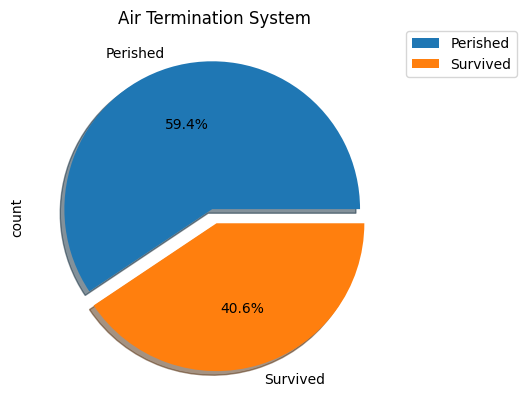

In [64]:
data = y.value_counts()
labels = ['Perished', 'Survived']
ax = data.plot(kind="pie", 
               autopct='%1.1f%%', 
               shadow=True, 
               explode=[0.05, 0.05], 
               legend=True, title='Air Termination System', 
               labels=labels)

ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [35]:
# Schritt 1: Vorhersagenwahrscheinlichkeiten bekommen
y_pred_proba = model.predict_proba(X)[:, 1]  # Wahrscheinlichkeiten für die positive Klasse (z.B. Überlebende)

# Schritt 2: Definiere einen neuen, niedrigeren Schwellenwert
threshold = 0.4  # Beispiel: Setze den Schwellenwert auf 0.3

# Schritt 3: Klassifiziere basierend auf dem neuen Schwellenwert
y_pred_new_threshold = (y_pred_proba >= threshold).astype(int)

y_pred_new_threshold[:5]

array([0, 1, 1, 1, 0])

Accuracy Score mit neuem Threshold: 0.8011204481792717
ROC AUC Score mit neuem Threshold: 0.8014882888744308
Classification Report:
               precision    recall  f1-score   support

    Perished       0.86      0.80      0.83       424
    Survived       0.73      0.80      0.77       290

    accuracy                           0.80       714
   macro avg       0.79      0.80      0.80       714
weighted avg       0.81      0.80      0.80       714



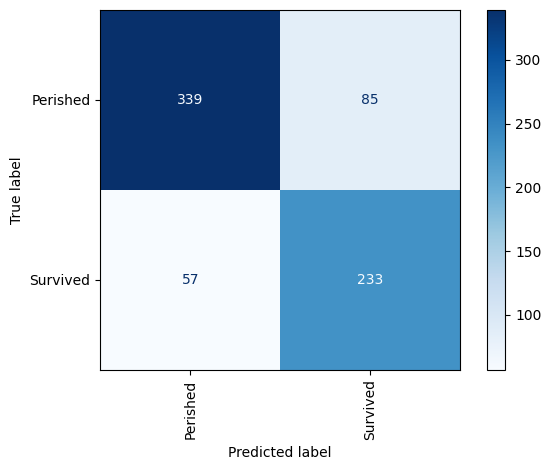

In [36]:
# Schritt 4: Prüfe die Leistung des Modells mit dem neuen Schwellenwert
print("Accuracy Score mit neuem Threshold:", accuracy_score(y, y_pred_new_threshold))
print("ROC AUC Score mit neuem Threshold:", roc_auc_score(y, y_pred_new_threshold))
print("Classification Report:\n", classification_report(y, y_pred_new_threshold, target_names=['Perished', 'Survived']))

# Optional: Zeige die neue Konfusionsmatrix
cm = confusion_matrix(y, y_pred_new_threshold)
ConfusionMatrixDisplay(cm, display_labels=['Perished', 'Survived']).plot(cmap='Blues')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


`accuracy:` Accuracy misst, wie viele Vorhersagen das Modell insgesamt richtig gemacht hat, was bei ausgewogenen Daten sinnvoll ist, aber bei unausgewogenen Daten irreführend sein kann.


`AUC (Area Under Curve):` misst, wie gut das Modell zwischen den Klassen unterscheidet, unabhängig von der Klassenschwelle, und ist besonders hilfreich bei unausgewogenen Daten, da sie die allgemeine Trennfähigkeit des Modells bewertet.

Ein AUC-Wert von:

- 1: Perfekte Trennung der Klassen.

- 0.5: Das Modell unterscheidet nicht besser als zufällige Vorhersagen (Zufallstreffer).

- <0.5: Das Modell ist schlechter als zufällig und könnte die Klassen vertauschen.

In [37]:
print("Accuracy Score:", round(accuracy_score(y, y_pred),4))
print("ROC AUC Score:", round(roc_auc_score(y, y_pred),4))

Accuracy Score: 0.7899
ROC AUC Score: 0.7779


In [38]:
100 / 714 * (357+207)

78.99159663865547

Koeffizieten
---
Der Intercept (oder Achsenabschnitt) von 2.469827 ist der Basiswert der logit-Funktion, wenn alle anderen unabhängigen Variablen (Pclass, Sex, Age) gleich null sind. Er repräsentiert den log-Odds-Wert der Vorhersage, wenn alle anderen Variablen auf ihren Durchschnittswert gesetzt sind.

Der Koeffizient für `Pclass` ist negativ (-1.249207). Dies bedeutet, dass eine höhere Klassenstufe (Pclass) (z.B. dritte Klasse) die Wahrscheinlichkeit, das Ereignis zu erleben (hier vermutlich Überleben), verringert.

Der Koeffizient für `Sex` ist positiv (2.412445). Da es sich um eine kategoriale Variable handelt (wahrscheinlich kodiert als 0 für männlich und 1 für weiblich), bedeutet dieser positive Koeffizient, dass Frauen (Sex = 1) eine höhere Wahrscheinlichkeit zu überleben haben als Männer (Sex = 0).


Der Koeffizient für `Age` ist leicht negativ (-0.036138). Dies bedeutet, dass ein Anstieg des Alters die Wahrscheinlichkeit, zu überleben, geringfügig senkt.

In [39]:
dataframe = pd.DataFrame(model.coef_, columns=X.columns)
dataframe["Intercept"] = model.intercept_
dataframe

,Pclass,Sex,Age,Intercept
0,-1.249207,2.412445,-0.036138,2.469827


Cross-Validdation
---

Der Cross-Validation Score von 0.7857 bedeutet, dass das Modell in einem 5-fach Cross-Validation-Verfahren im Durchschnitt eine Accuracy von 78,57% erzielt hat. Das Modell sagt also in etwa 78,57 % der Fälle korrekt vorher, ob eine Person überlebt hat oder nicht, basierend auf den vorhandenen Features.


In [40]:
# Schritt 7: Cross-Validation (5-fach)
cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Score: ", cv_score)
print("Cross-Validation Score (Mean):", cv_score.mean())

Cross-Validation Score:  [0.76923077 0.83216783 0.77622378 0.74825175 0.8028169 ]
Cross-Validation Score (Mean): 0.7857382054565154


### Confusion Matrix:
Mit der Confusion Matrix können wir feststellen, wie unser Modell die Vorhersagen klassifiziert hat:


\begin{matrix}
 & \text{Vorhergesagt: Verstorben} & \text{Vorhergesagt: Überlebt} \\
\text{Tatsächlich: Verstorben} & \text{True Positive (TP)} & \text{False Negative (FN)} \\
\text{Tatsächlich: Überlebt} & \text{False Positive (FP)} & \text{True Negative (TN)} \\
\end{matrix}


- **True Positive (TP)**: Die Person ist **verstorben** und unser Modell hat sie korrekt als verstorben klassifiziert.
- **False Negative (FN)**: Die Person ist **verstorben**, aber unser Modell hat sie fälschlicherweise als Überlebende klassifiziert.
- **False Positive (FP)**: Die Person hat **überlebt**, aber unser Modell hat sie fälschlicherweise als verstorben klassifiziert.
- **True Negative (TN)**: Die Person hat **überlebt** und unser Modell hat sie korrekt als überlebende klassifiziert.


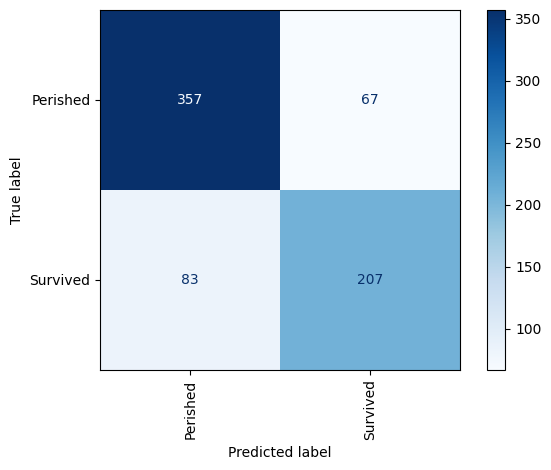

In [41]:
# Schritt 9: Erstelle die Konfusionsmatrix für Testdaten
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Perished', 'Survived']).plot(cmap='Blues')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.savefig("LOG_Output/ConfusionMatrix") 
plt.show()

In [42]:
100 / 357 * (357) #TP / (TP + FN)

100.0

### Sensitivität (True Positive Rate - TPR)
- **Sensitivität** misst, wie gut **positive Fälle** (verstorben) erkannt werden. Es ist der Anteil der tatsächlichen positiven Fälle (verstorben), die vom Modell korrekt als positiv klassifiziert wurden.



### Spezifität (True Negative Rate - TNR)
- **Spezifität** misst, wie gut **negative Fälle** (überlebt) erkannt werden. Es ist der Anteil der tatsächlichen negativen Fälle (überlebt), die vom Modell korrekt als negativ klassifiziert wurden.


In [43]:
# Extrahiere die Werte aus der Konfusionsmatrix
TN, FP, FN, TP = cm.ravel()

# Berechne Sensitivität (TPR)
sensitivity = TP / (TP + FN)
print("Sensitivität (True Positive Rate):", sensitivity)

# Berechne Spezifität (TNR)
specificity = TN / (TN + FP)
print("Spezifität (True Negative Rate):", specificity)

Sensitivität (True Positive Rate): 0.7137931034482758
Spezifität (True Negative Rate): 0.8419811320754716


### Classification Report:
Der **Classification Report** liefert eine detaillierte Übersicht der **Leistung eines Klassifikationsmodells** anhand verschiedener Metriken:

- **Precision (Genauigkeit)**: Der Anteil der korrekt als positiv klassifizierten Fälle an allen als positiv vorhergesagten Fällen.


- **Recall (Sensitivität / True Positive Rate)**: Der Anteil der korrekt als positiv klassifizierten Fälle an allen tatsächlichen positiven Fällen.



- **F1-Score**: Der harmonische Mittelwert von Precision und Recall. Der F1-Score gibt einen Kompromiss zwischen Precision und Recall und ist besonders nützlich, wenn ein Ungleichgewicht zwischen den Klassen besteht.



- **Accuracy (Genauigkeit)**: Der Anteil der korrekt klassifizierten Fälle (sowohl positive als auch negative) an allen Fällen.


In [44]:
# Schritt 10: Zeige den Classification Report für Testdaten an
target_names = ['Perished', 'Survived']
print("Classification Report:\n", classification_report(y, y_pred, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

    Perished       0.81      0.84      0.83       424
    Survived       0.76      0.71      0.73       290

    accuracy                           0.79       714
   macro avg       0.78      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



### ROC-Kurve (Receiver Operating Characteristic)
Die ROC-Kurve zeigt die Leistung eines Klassifikationsmodells durch das Verhältnis von **Sensitivität (TPR)** und **False Positive Rate (FPR)** bei verschiedenen Schwellenwerten.



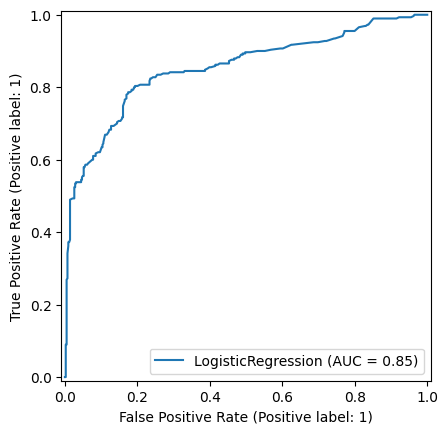

In [45]:
# Schritt 11: Berechne und zeige die ROC-Kurve auf den Testdaten
RocCurveDisplay.from_estimator(model, X, y)
plt.savefig('LOG_Output/ROC_Curve.png')
plt.savefig("LOG_Output/Title_") 
plt.show()

Der ROC-AUC-Score misst die Trennleistung eines Modells, also wie gut es zwischen den Klassen (z. B. Überleben und Nicht-Überleben) unterscheidet. Ein Wert von 1.0 bedeutet perfekte Vorhersagen, 0.5 steht für zufällige Vorhersagen. Ein höherer Score (z. B. 0.85) zeigt eine gute Modellleistung.

In [46]:
# Schritt 12: Berechne den AUC-ROC-Score auf Testdaten
auc_roc_score = roc_auc_score(y, model.predict_proba(X)[:,1])

print("AUC-ROC Score:", auc_roc_score)

AUC-ROC Score: 0.8523300260247235


## Erstellung eine Vohersage: 
---


Person 1:

- ***22 Jahre alt, männlich, 3. Klasse***

In [47]:
Male = [[3,1,22]]
print(model.predict(Male)[0])
probability = model.predict_proba(Male)[0][1]
print(f'Überlebens wahrscheinlichkeit: {probability:.1%}')

1
Überlebens wahrscheinlichkeit: 58.4%


Person 2:

- ***44 Jahre alt, Weiblich, 1. Klasse***


In [48]:
Female = [[1,1,44]]
print(model.predict(Female)[0])
probability = model.predict_proba(Female)[0][1]
print(f'Probability of survival: {probability:.1%}')

1
Probability of survival: 88.5%


In [49]:
df.query('Pclass == 1 & Sex == 1 & Age == 44')

,Survived,Pclass,Sex,Age
194,1,1,1,44.0
523,1,1,1,44.0


Person 3:

- ***66 Jahre alt, männlich, 1. Klasse***


In [50]:
df.query('Pclass == 3 & Sex == 0 & Age == 23')

,Survived,Pclass,Sex,Age
350,0,3,0,23.0
753,0,3,0,23.0
833,0,3,0,23.0


In [51]:
Female = [[3,0,23]]
print(model.predict(Female)[0])
probability = model.predict_proba(Female)[0][1]
print(f'Probability of survival: {probability:.1%}')

0
Probability of survival: 10.8%


---

## Logit:

In [52]:
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [53]:
# Schritt 1: Konstante (Intercept) hinzufügen
X_const = sm.add_constant(X)

# Schritt 2: Logit-Modell erstellen
logit_model = sm.Logit(y, X_const)

# Schritt 3: Modell anpassen
results_logit = logit_model.fit()
print(results_logit.summary())
# Schritt 4: Vorhersagen treffen
predictions_Logit = results_logit.predict(X_const)




Optimization terminated successfully.
         Current function value: 0.453285
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.3289
Time:                        09:58:47   Log-Likelihood:                -323.65
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.860e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5339      0.456      5.554      0.000       1.640       3.428
Pclass        -1.2885      0.

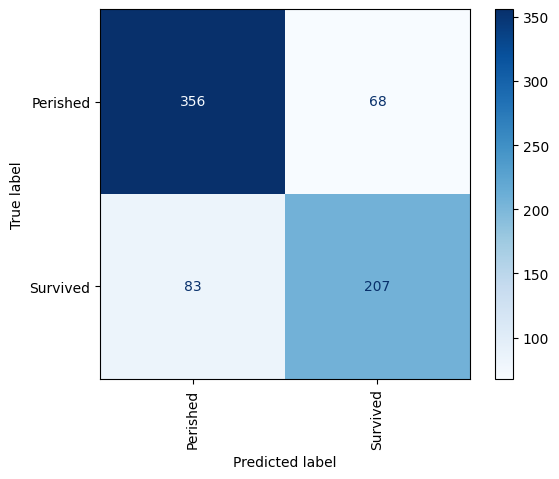

In [54]:
# Wahrscheinlichkeiten aus dem Modell
thresholds = 0.5
# Wahrscheinlichkeiten in binäre Vorhersagen umwandeln (Schwellenwert = 0.5)
binary_predictions = [1 if p > thresholds else 0 for p in predictions_Logit]

# Konfusionsmatrix berechnen
cm_Logit = confusion_matrix(y, binary_predictions)
ConfusionMatrixDisplay(cm_Logit, display_labels=['Perished', 'Survived']).plot(cmap='Blues')
plt.xticks(rotation='vertical')
plt.savefig("LOG_Output/Title_") 
plt.show()

In [55]:
# Wahrscheinlichkeiten in binäre Vorhersagen umwandeln (Schwellenwert = 0.5)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions_Logit]

# Klassifikationsbericht basierend auf den binären Vorhersagen
print(classification_report(y, binary_predictions))


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       424
           1       0.75      0.71      0.73       290

    accuracy                           0.79       714
   macro avg       0.78      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



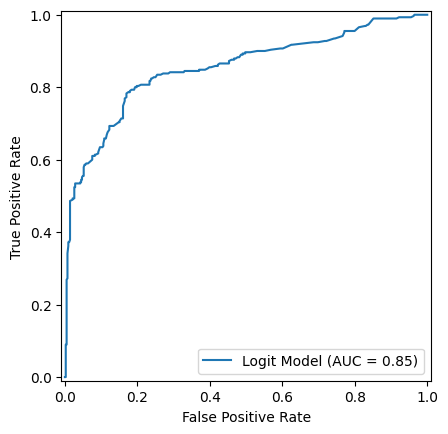

In [56]:
# Wahrscheinlichkeiten für Klasse 1 (positive Klasse) vorhersagen
y_logit = results_logit.predict(X_const)

# Berechne die FPR (False Positive Rate), TPR (True Positive Rate) und die Schwellenwerte
fpr, tpr, thresholds = roc_curve(y, y_logit)

# Berechne den AUC-Score (Area Under the Curve)
roc_auc = roc_auc_score(y, y_logit)

# ROC-Kurve anzeigen
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logit Model')
roc_display.plot()

# Plot anzeigen
plt.savefig("LOG_Output/Title_") 
plt.show()


Vohersagen mit dem Logit Model:

---
## Probit


In [57]:
# Konstante hinzufügen
X_const = sm.add_constant(X)

# Probit-Modell erstellen und anpassen
Probit_model = sm.Probit(y, X_const)

# Schritt 3: Modell anpassen
results_probit = Probit_model.fit()
print(results_probit.summary())




Optimization terminated successfully.
         Current function value: 0.455180
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                         Probit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.3261
Time:                        09:58:47   Log-Likelihood:                -325.00
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 7.167e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3855      0.259      5.346      0.000       0.878       1.893
Pclass        -0.7206      0.

In [58]:
# Schritt 4: Vorhersagen treffen
predictions_probit = results_probit.predict(X_const)

# Wahrscheinlichkeiten aus dem Modell
predictions_probit[:5]

0    0.110684
1    0.915803
2    0.571316
3    0.924823
4    0.068537
dtype: float64

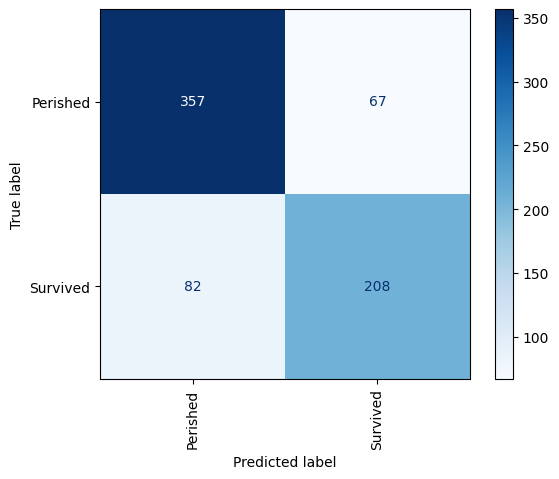

In [59]:
# Wahrscheinlichkeiten in binäre Vorhersagen umwandeln (Schwellenwert = 0.5)
binary_predictions_probit = [1 if p > 0.5 else 0 for p in predictions_probit]

# Konfusionsmatrix berechnen
cm_Probit = confusion_matrix(y, binary_predictions_probit)
ConfusionMatrixDisplay(cm_Probit, display_labels=['Perished', 'Survived']).plot(cmap='Blues')
plt.xticks(rotation='vertical')
plt.savefig("LOG_Output/Title_") 
plt.show()


In [60]:
# Klassifikationsbericht basierend auf den binären Vorhersagen
print(classification_report(y, binary_predictions_probit))


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       424
           1       0.76      0.72      0.74       290

    accuracy                           0.79       714
   macro avg       0.78      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



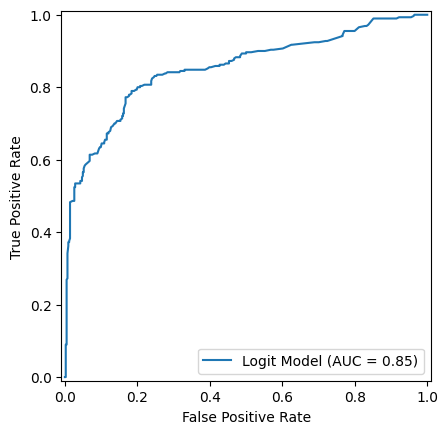

In [61]:
# Berechne die FPR (False Positive Rate), TPR (True Positive Rate) und die Schwellenwerte
fpr, tpr, thresholds = roc_curve(y, predictions_probit)

# Berechne den AUC-Score (Area Under the Curve)
roc_auc = roc_auc_score(y, predictions_probit)

# ROC-Kurve anzeigen
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logit Model')
roc_display.plot()

# Plot anzeigen
plt.savefig("LOG_Output/Title_") 
plt.show()


In [62]:
import pandas as pd
from scipy.stats import chi2_contingency

# Schritt 1: Erstelle eine Kreuztabelle
# Annahme: df ist dein DataFrame mit den Variablen 'Survived' und 'Pclass'
contingency_table = pd.crosstab(df['Survived'], df['Age'])

# Schritt 2: Chi²-Test durchführen
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Ergebnisse anzeigen
print(f"Chi²-Wert: {chi2}")
print(f"p-Wert: {p}")
print(f"Freiheitsgrade: {dof}")
print("Erwartete Häufigkeiten:")
print(expected)

# Beurteilung des Ergebnisses
if p < 0.05:
    print("Das Ergebnis ist statistisch signifikant. Es gibt einen Zusammenhang zwischen den Variablen.")
else:
    print("Das Ergebnis ist nicht statistisch signifikant. Es gibt keinen Zusammenhang zwischen den Variablen.")

Chi²-Wert: 104.15604988902831
p-Wert: 0.10141111018860959
Freiheitsgrade: 87
Erwartete Häufigkeiten:
[[ 0.59383754  0.59383754  1.18767507  1.18767507  0.59383754  4.15686275
   5.93837535  3.56302521  5.93837535  2.37535014  1.78151261  1.78151261
   2.37535014  4.75070028  1.18767507  2.37535014  0.59383754  1.18767507
   3.56302521  0.59383754  2.96918768 10.0952381   7.71988796 15.43977591
  14.84593838  8.90756303  0.59383754 14.25210084 16.03361345  8.90756303
   0.59383754 17.81512605  0.59383754 13.65826331 10.68907563 10.68907563
  14.84593838  1.18767507 11.8767507  14.84593838  1.18767507 10.0952381
  10.68907563  1.18767507  8.90756303  8.90756303  0.59383754 10.68907563
  13.06442577  0.59383754  3.56302521  6.53221289  8.31372549  7.71988796
   1.18767507  3.56302521  7.71988796  2.96918768  5.34453782  7.12605042
   1.18767507  1.78151261  5.34453782  5.34453782  3.56302521  5.93837535
   4.15686275  3.56302521  0.59383754  4.75070028  1.18767507  0.59383754
   2.3753501